<img src=https://www.federginnastica-crpva.it/wp-content/uploads/2020/05/Logo-Politecnico-Torino-blu-scaled.jpg width="900">

# Mathematics for Machine Learning, July 2020 
## Silvia Giammarinaro s269991 

Index:
1.   [Introduction](#scrollTo=v7Wunb2fJa9T&line=1&uniqifier=1)
2.   [Overview on machine learning algorithms](#scrollTo=f7RPD-yxLGYO&line=1&uniqifier=1)
3.   [Logistic Regression](#scrollTo=dgzmThnIJqzR&line=1&uniqifier=1)
4.   [Support Vector Machines](#scrollTo=EYpkGkwSk0DL&line=1&uniqifier=1)
5.   [Decision Trees](#scrollTo=RE2APb-BJxED&line=1&uniqifier=1)
6.   [Random Forest](#scrollTo=4HUioPNlJ1zy&line=1&uniqifier=1)
7.   [Naive Bayes](#scrollTo=WumXinBZLSqt&line=1&uniqifier=1)
8.   [PCA](#scrollTo=P6CURqOeLETe&line=1&uniqifier=1)
9.   [KMeans](#scrollTo=I5j50fQtLHhF&line=1&uniqifier=1)
10.   [Hierchical Clustering](#scrollTo=I5j50fQtLHhF&line=1&uniqifier=1)
11.   [K-Nearest Neighbors](#scrollTo=I5j50fQtLHhF&line=1&uniqifier=1)  
12.  [Conclusions](#scrollTo=_IQiee0KLWIg&line=1&uniqifier=1)


# 1. Introduction

In this project we want to analyze and implement some of the main Machine Learning algorithms using the Python language. To perform these analisis, we will use the
[Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). \
We will first explore the dataset and apply some preprocessing techniques if needed. Then for every algorithm choosen, we show the mathematical theory behind it and we apply it to the dataset, analysing the pros and cons of it. We report below the project workflow. \
Before starting, we import the required libraries and read the file containing the dataset.
![alt text](https://raw.githubusercontent.com/sigeek/breast-cancer-analysis/master/docs/images/flow.png)

In [ ]:
import pandas as pd
import io
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, ParameterGrid, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import classification_report, f1_score, accuracy_score, make_scorer, confusion_matrix
from yellowbrick.classifier import ClassificationReport
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.tree import export_graphviz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
url = 'https://raw.githubusercontent.com/sigeek/breast-cancer-analysis/master/breast_cancer.csv'
data = pd.read_csv(url)

We report here the description of the dataset provided by the creators:

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image. An example image is reported below.

We report here some information about the dataset:


* Number of instances: 569 

* Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)


* Attribute information

  ID number \
  Diagnosis (M = malignant, B = benign) \
  Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) \
    b) texture (standard deviation of gray-scale values) \
    c) perimeter \
    d) area \
    e) smoothness (local variation in radius lengths) \
    f) compactness (perimeter^2 / area - 1.0) \
    g) concavity (severity of concave portions of the contour) \
    h) concave points (number of concave portions of the contour) \
    i) symmetry \
    j) fractal dimension ("coastline approximation" - 1) \

  The mean, standard error, and "worst" or largest (mean of the three
  largest values) of these features were computed for each image,
  resulting in 30 features.  For instance, field 3 is Mean Radius, field
  13 is Radius SE, field 23 is Worst Radius.

  All feature values are recoded with four significant digits.


* Missing attribute values: none

* Class distribution: 357 benign, 212 malignant


<img src=https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-original.jpg width="900">

In [ ]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


As we can see we have  total of 569 observations, divided in benign and malignant canceres. All the predictors are numerical except for the 'diagnosis' feature which is categorical ('M' stands for malignant, 'B' for benign). \
After a complete analysis reported [here](https://sigeek.github.io/breast-cancer-analysis/dataset-analysis.html), we can drop the columns which are highly correlated with other predictors. Correlation is computed in the following way: \
\begin{align}
\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X\sigma_Y}
\end{align}
where $\sigma_{XY}$ is the covariance between X and Y and $\sigma_X$ and $\sigma_Y$ are the standard deviations. \
The covariance is expressed as follows : \
\begin{align}
\sigma_{XY} = \frac{1}{N}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})
\end{align}
where $x_i, y_i$ are the samples of two different columns and $\bar{x}, \bar{y}$ are the epected value of such distributions.

In [ ]:
data.drop(columns=['area_worst', 'concave points_worst', 'concavity_mean', 'perimeter_worst', 'radius_mean', 'radius_se', 'radius_worst', 'texture_worst', 'id', 'Unnamed: 32', 'area_mean', 'area_se'], inplace=True)
data

,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,8.589,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,M,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,3.398,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,M,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,4.585,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,M,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,3.445,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,M,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,5.438,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,142.00,0.11100,0.11590,0.13890,0.1726,0.05623,1.2560,7.673,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,M,28.25,131.20,0.09780,0.10340,0.09791,0.1752,0.05533,2.4630,5.203,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,M,28.08,108.30,0.08455,0.10230,0.05302,0.1590,0.05648,1.0750,3.425,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,M,29.33,140.10,0.11780,0.27700,0.15200,0.2397,0.07016,1.5950,5.772,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


We are left with 21 columns. The first transformation we apply to our data is standardization. **Standardization**, which get all attrbutes to have the same scale. 
\begin{align}
z = \frac{x-\mu}{S}
\end{align}
where x is our observation, $\mu$ is the estimated expected value and S its estimated standard deviation. \
Now we can divide our dataset in predictors $X$ and labels $Y$. We also apply a label encoder to our labels vector so we convert 'B' and 'M' to 0 and 1 respectly.


In [ ]:
X = data.loc[:, data.columns != 'diagnosis']
y = data.diagnosis
X = (X - X.mean())/X.std()
le = LabelEncoder()
y = le.fit_transform(y)
data.diagnosis = le.fit_transform(data.diagnosis)

Using the **correlation matrix**, we can see the correlation between all the remaing features and the label.

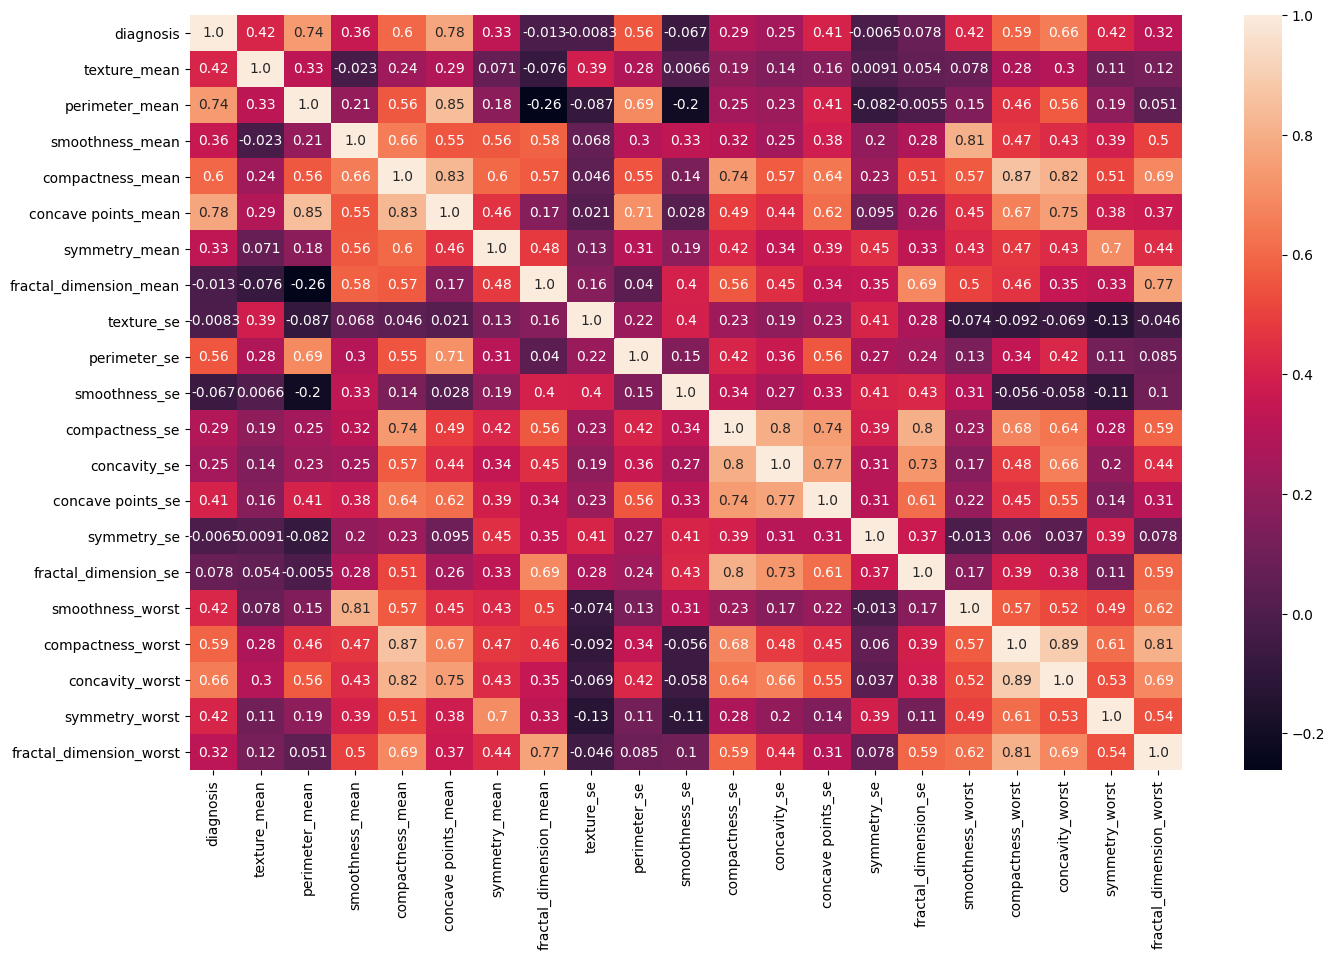

In [ ]:
corr = data.corr(method='pearson')
plt.figure(figsize=(16,10), dpi=100)
sns.heatmap(corr, annot=True, fmt='.2')
plt.show()

We also visualize all the features with **box plots**. A box plot is a graphical representation to visualize quantiles and outliers of a data distrbution. Outliers are depicted as single points.

In [ ]:
dataset = pd.concat([data.diagnosis,X], axis=1)
dataset = pd.melt(dataset,id_vars='diagnosis',
                    var_name="features",
                    value_name='value')
fig = px.box(dataset, x="features", y="value", color="diagnosis")
fig.show()

In the end we plot the most correlated features with the labels with **violin plots**. Violin plots associate the two different data distribution given from the two different labels. They are similar to box plot but they show the probability density.


In [ ]:
X_correlated = X[['perimeter_mean', 'compactness_mean', 'concave points_mean', 'concavity_worst']] #correlation >= 0.6
corr_dataset = pd.concat([data.diagnosis,X_correlated], axis=1)
corr_dataset = pd.melt(corr_dataset,id_vars='diagnosis',
                    var_name="features",
                    value_name='value')
fig = go.Figure()

fig.add_trace(go.Violin(x=corr_dataset["features"][corr_dataset['diagnosis'] == 0],
                        y=corr_dataset["value"][corr_dataset['diagnosis'] == 0],
                        legendgroup='Benign', scalegroup='Yes', name='Benign cancer',
                        side='negative',
                        line_color='green')
             )
fig.add_trace(go.Violin(x=corr_dataset["features"][corr_dataset['diagnosis'] == 1],
                        y=corr_dataset["value"][corr_dataset['diagnosis'] == 1],
                        legendgroup='Malignant', scalegroup='No', name='Malignant disease',
                        side='positive',
                        line_color='red')
             )
fig.update_traces(meanline_visible=True)
fig.show()

# 2. Overwiew on machine learning algorithms

Machine learnign algorithms can be divided in four categories: supervised learning, unsupervised lerning, semisupervised learning and Reinforcement learning. In this project we will focus on supervised learning and unsupervised learning. \
In supervised learning, we are feeding the algorithm with the training set and their relative labels. The supervised learning algorithms we will analyze are:
* Logistic Regression
* Support Vector Machines
* Decision Trees
* Random Forests  
* Naive Bayes

In unsupervised learning the training data in unlabeled. Here are some algorithms we will examine
* PCA
* K-Means
* K-nearest neighbors

Once we define our model, we have to train the model on the training set, validate it on the validation set and then test it on the test set. To evaluate our models we introduce some metrics and some definitions. \
At the end of our training and validation phase, we will have a vector of predicted labels $y_{pred}$ to compare to the true labels $y_{true}$. We consider as positive class benign cancer 'B' and as negative malignant cancer 'M'. Doing such comparisons we can come across four different scenarios:
* TP: true positive, the prediction is equal to the true label, which is positive (B = B);
* FP: false positive, the prediction is not equal to the true label, which is positive (M != B);
* TN: true negative, the prediction is equal to the true label, which is negative (M = M);
* FN: false negative, the prediction is not equal to the true label, which is positive (B != M);

The metrics we will refer to are the following:
* precision: the accuracy of the positive predictions
\begin{align}
precision = \frac{TP}{TP + FP}
\end{align}
* recall: also called sensitivity or true positive rate, it is the ratio of positive instances that are correctly detected by the classifier
\begin{align}
recall = \frac{TP}{TP + FN}
\end{align}
* accuracy: it is the measure of all the correctly identified samples, mostly used where classes are balanced
\begin{align}
accuracy = \frac{TP + TN}{TP + FP + TN + FN}
\end{align}
* f1 score: which combines precision and recall
\begin{align}
F_1 = 2 \text{ x } \frac{precision \text{ x } recall}{precision + recall}
\end{align}

Now we can split the dataset in train, validation and test sets. We will use k-fold cross-validation to validate our models. In cross-validation we first divide the dataset in training set and test set and then the training data in divided in k fold, one of them will our validation set. This split is repeated k times. A graphical representation of such splits is reported below. \
When the model requires hyper-parameters search we will use GridSearchCV, which finds the best configuration applying a cross-validation with k=5. Otherwise, if the model does not require a hyper-parameters search we will apply cross_val_score, which returns the accuracy for every split. 


![alt text](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
def plot_accuracy(y_test, y_pred):
  plt.figure(figsize=(5,5))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, annot_kws={"fontsize":18}, linewidths=.5, square = True, cmap = "YlGnBu");
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'F1 Score: {0}'.format(f1_score(y_test, y_pred))
  plt.title(all_sample_title, size = 15)

# 3. Logistic Regression

Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.
Like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result 
\begin{align}
\hat{p} =\sigma(x^Tw)
\end{align}
where $\sigma$ is the sigmoid function that outputs a number between 0 and 1, x are our training data and w the parameter of the model we want to find. 
\begin{align}
\sigma(x) = \frac{1}{1+ e^{-x}}
\end{align}

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

Once the model has estimated the probabily, the prediction is made in the following way:
* if $\hat{p} < $ 0.5, the predicted class is equal to 0;
* if $\hat{p} \ge$ 0.5,  the predicted class is equal to 1.

The way the model is trained can be derived by the cost function. The objective of training is to set the parameter vector $w$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).
\begin{align}
c(w) = 
\begin{cases}
-log(\hat{p}) & \text{if y = 1 }\\
-log(1 - \hat{p})  & \text{if y = 0}
\end{cases}
\end{align}

This cost function makes sense because – log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want. \\
The cost function over the whole training set is simply the average cost over all training instances.

\begin{align}
\mathcal{L}(w) = - \frac{1}{m} \sum_{i = 1}^{m}[y^{(i)}log(\hat{p}^{(i)})+ (1-y^{(i)})log(1-\hat{p}^{(i)})]
\end{align}

To solve this equation we can use the Gradient descent which guarantees to find the global minimum. So we compute the partial deivative of the cost function to the parameter w:
\begin{align}
\frac{\partial}{\partial w_j} \mathcal{L}(w) = \frac{1}{m} \sum_{i=1}^{m} (\sigma(w^Tx^{(i)}) - y^{(i)}) x^{(i)}_j
\end{align}
and we can update w in the following way:
\begin{align}
w_j = w_j + \mathcal{E} \frac{\partial}{\partial w_j} \mathcal{L}(w)
\end{align}

**PROS:**
* Feature scaling not needed;
* Hyper-parameters tuning not needed.


**CONS:**
* Poor performance on non-linear data (image data);
* Poor performance with irrelevant and highly correlated features;
* Not very powerful algorithm in respect to others.


Best model:
{'n_jobs': -1, 'penalty': 'l2', 'random_state': 1, 'solver': 'saga', 'tol': 0.0001}
F1 score:  0.975609756097561
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



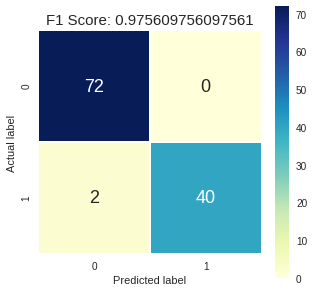

In [ ]:
params = {
  "penalty": ["l2"],
  "tol": [1e-4, 1e-5],
  "random_state": [1],
  "n_jobs": [-1],
  "solver": ["lbfgs", "liblinear", "sag", "saga"]
}

log_reg = LogisticRegression()
model = GridSearchCV(log_reg, params)
model.fit(X_train, y_train)
best_model_train = model.best_estimator_
print("Best model:")
print(model.best_params_)
y_predt = best_model_train.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

# 4. Support Vector Machines 

Given a general classification task, we have to find a way to divide the points in two or more groups. The immediate approach would be to draw a straight line, but that line is not unique. The solution to this problem is to use Support Vector Machines.
Support Vector Machines choose the maximum margin between the groups, the points used for defining such boundaries are called support vectors. The wideness of the margin can be chosen changing the hyper-parameter C in the model: if C is small we have soft margin, otherwise hard margin. Note that choosing a right C is crucial also for outliers, which have to be avoided. \
This algorithm can deal with two or more classes. The approaches used for a multi-class problem are One vs One (OvO) and One vs All (OvA).
SVM can be applied to both linearly and non-linearly separable data. We will analyze both cases, explaining the main differences:

**Linear case**: in this scenario we are analyzing binary linearly separable datasets, like the one reported below. 
The two different classes can be written as: 
\begin{align}
\langle x_i, w \rangle + b = 1 \text{, }  \langle x_i, w \rangle + b = -1
\end{align}
where $x_i$ are the points of the dataset, $w$ is the vector which defines the hyperplane dividing the two classes and b is the bias term. The objective function used to define the margin is the following:
\begin{align}
\underset{w, b}{\text{minimize} } \frac{1}{2}||w||^2 \text{ s.t. } y_i[ \langle x_i, w \rangle +b] \ge 1 
\end{align}
where $y_i$ are the predictions made by the algorithm. 
\begin{align}
y_i = \langle w, x_i \rangle + b
\end{align}

 The weights can be expressed as it follows:
\begin{align}
w = \sum_i y_i\alpha_ix_i 
\end{align}
To solve this problem we can use the lagrangian function and the KKT conditions and we obtain this optimization problem:
\begin{align}
\underset{\alpha}{\text{maximize }} -\frac{1}{2}\alpha_i \alpha_jy_iy_j\langle x_i, x_j \rangle + \sum_i \alpha_i \text{ s.t. } \sum \alpha_iy_i = 0 \text{ and } \alpha_i \ge 0
\end{align}

We have just analyzed the case with C=1. In the general case we introduce a slack variable $\xi$. We redefine the classes and the objective functions in the following way:
\begin{align}
\langle x_i, w \rangle + b \boldsymbol{\ge 1 - \xi} \text{, }  \langle x_i, w \rangle + b \boldsymbol{\le -1 + \xi}
\end{align}
Margin problem:
\begin{align}
\underset{w, b}{\text{minimize }} \frac{1}{2}||w||^2 \boldsymbol{ + C \sum_i \xi_i} \text{ s.t. } y_i[ \langle x_i, w \rangle +b] \ge 1 \boldsymbol{- \xi_i \text{ and } \xi_i \ge 0}
\end{align}
Dual problem:
\begin{align}
\underset{\alpha}{\text{maximize }} -\frac{1}{2}\alpha_i \alpha_jy_iy_j\langle x_i, x_j \rangle + \sum_i \alpha_i \text{ s.t. } \sum \alpha_iy_i = 0 \text{ and } \boldsymbol{\alpha_i \in [0, C]}
\end{align}


**Non linear case**: for dealing with more complex datasets, we can use the kernel trick. With a kernel function the data is mapped to a higher dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products. This process is much cheaper than the explicit computation of the coordinates. \
Margin problem:
\begin{align}
\underset{w, b}{\text{minimize }} \frac{1}{2}||w||^2 + C \sum_i \xi_i \text{ s.t. } y_i[ \langle w, \boldsymbol{\phi(x_i)} \rangle +b] \ge 1 - \xi_i \text{ and } \xi_i \ge 0
\end{align}
Dual problem:
\begin{align}
\underset{\alpha}{\text{maximize }} -\frac{1}{2}\alpha_i \alpha_jy_iy_j \boldsymbol{k(x_i, x_j)} + \sum_i \alpha_i \text{ s.t. } \sum \alpha_iy_i = 0 \text{ and } \alpha_i \in [0, C]
\end{align}
Support vector expansion:
\begin{align}
y_i = \sum_i \alpha_i y_i \boldsymbol{k(x_i, x)}  + b
\end{align}
In the non-linear case we introduce another hyper-parameter $\gamma$, which  leads to more accuracy but biased results and vice-versa.
In the PCA section, we report some examples of the application of the support vector machines in a two dimensional space. \
**PROS:**
* Performs well in high-dimensional space;
* Best algorithm when classes are linearly separable;
* Outliers have less impact;
* SVM is suited for extreme case binary classification.


**CONS:**
* Slow;
* Poor performance with Overlapped classes;
* Hyper-parameter tuning;
* Selecting the appropriate kernel function can be tricky.

![alt text](https://raw.githubusercontent.com/sigeek/breast-cancer-analysis/master/docs/images/svm.png)




In [ ]:
def plot_data_boundaries(X, y, model, parameters, title, axes_labels, n_cols=1, n_rows=1, show_support_vectors=False, single_title_appendix=None ):
    # function for visualizing data and the decision boundaries
    # X, y: arrays data
    # model: string indicating the model 
    # parameters: array of parameters in order to create different plots. In the case of RBFKernelBest it is the model 
    # title: title of the entire set of figures
    # single_title_appendix: the appendix of the sub-title below every figure
    # axes_labels: labels for the x and y axes
    
    if model != "model":
        n_figures = len(parameters)
        #fig, axs = plt.subplots(n_cols, n_rows, figsize=(5*n_cols,5*n_rows))
        fig = plt.figure(figsize=(5*n_cols,5*n_rows))
        fig.suptitle(title)
        
        fig.set_dpi(100)
    else:
        plt.plot(dpi = 100)
        plt.title(title)
        
    cmap = ListedColormap(['plum', 'blueviolet', 'darkslateblue'])
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if model == "model":
        #parameters.fit(X, y)
        Z = parameters.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel=axes_labels[0]
        plt.ylabel=axes_labels[1]
        return
    
        #fig = plt.figure(figsize=(12,12))
        #for index, name in enumerate(names):
        #ax = fig.add_subplot(4,6,index+1)
    for index, k in enumerate(parameters):
        if model == "KNN":
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(X, y)
            Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
        elif model == "LinearSVM":
            SVM = SVC(C=k, kernel= 'linear')
            SVM.fit(X, y)
            Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
        elif model =="RBFKernel":
            SVM = SVC(C=k)
            SVM.fit(X, y)
            Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
            
        Z = Z.reshape(xx.shape)
        index_row = int(index/n_rows)
        index_col = index%n_rows
        #axs[index_row][index_col].pcolormesh(xx, yy, Z, cmap=cmap)
        #axs[index_row][index_col].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
        
        axs = fig.add_subplot(n_rows, n_cols, index+1)
        axs.pcolormesh(xx, yy, Z, cmap=cmap)
        axs.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
        if model != "KNN" and show_support_vectors==True:
            support_vectors = SVM.support_vectors_
            axs.scatter(support_vectors[:, 0], support_vectors[:, 1], marker='*', c='white', alpha=0.5, s=40)
        axs.set_xlim(xx.min(), xx.max())
        axs.set_ylim(yy.min(), yy.max())
        axs.set_title("%s = %s" % (single_title_appendix, k))
        axs.set(xlabel=axes_labels[0], ylabel=axes_labels[1])

Best model:
{'C': 1, 'kernel': 'linear', 'random_state': 1, 'tol': 0.001}
F1 score:  0.963855421686747
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



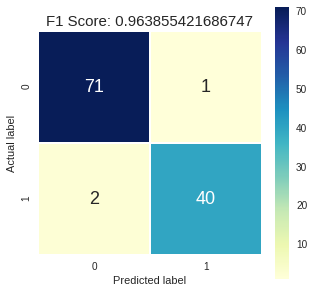

In [ ]:
### linear case
params = {
  "kernel": ["linear"],
  "tol": [1e-3, 1e-5, 1e-6],
  "random_state": [1],
  "C": [0.001, 0.01, 0.1, 1, 10, 100],
}

svc = SVC()
model = GridSearchCV(svc, params)
model.fit(X_train, y_train)
best_model_train = model.best_estimator_
print("Best model:")
print(model.best_params_)
y_predt = best_model_train.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

Best model:
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 1, 'tol': 0.001}
F1 score:  0.951219512195122
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



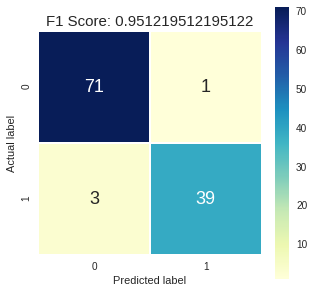

In [ ]:
### non linear case
params = {
  "kernel": ["rbf"],
  "tol": [1e-3, 1e-5, 1e-6],
  "random_state": [1],
  "C": [0.001, 0.01, 0.1, 1, 10, 100],
  "gamma": [0.001, 0.01, 0.1, 1, 10, 100]
}

svc = SVC()
model = GridSearchCV(svc, params)
model.fit(X_train, y_train)
best_model_train = model.best_estimator_
print("Best model:")
print(model.best_params_)
y_predt = best_model_train.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

# 5. Decision Trees

Decistion trees can perform both classification and regression tasks, in this project we only consider the classification case. They are also fundamental components of Random Forests, presented in the next chapter. \
A decision tree consists of split nodes and leaf nodes. Each split node  performs a split decision and routes a data sample x to the left child node or to the right child node. Starting at the root node, the training data is recursively split into subsets. In each step the best split is determined based on a criterion. Commonly used criteria are Gini index and Entropy: 
\begin{align}
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 \\
H_i = - \sum_{k=1}^{n} p_{i,k}logp_{i,k}
\end{align}
where $ p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node. \
Another common hyperparameter the user can set in the model is the max depth of the tree. To understand better how decision trees work, we report a graphical representation using graphviz. \
**PROS:**
* Normalization or scaling of data not needed;
*  No considerable impact of missing values;
* Easy visualization;
* Automatic Feature selection.

**CONS:**
* Prone to overfitting when using too much layers;
* Sensitive to data. If data changes slightly, the outcomes can change to a very large extent;
* Higher time required for training.

![alt text](https://www.researchgate.net/profile/Mei-Hung_Chiu/publication/295860754/figure/fig3/AS:333010919542789@1456407398669/Basic-structure-of-a-decision-tree-All-decision-trees-are-built-through-recursion.png)



Best model:
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'random_state': 0, 'splitter': 'best'}
F1 score:  0.8
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        72
           1       0.91      0.71      0.80        42

    accuracy                           0.87       114
   macro avg       0.88      0.84      0.85       114
weighted avg       0.87      0.87      0.86       114



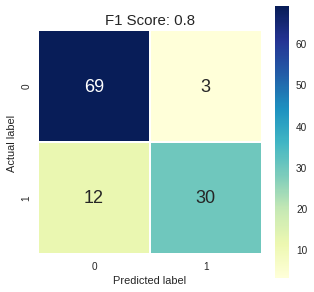

In [ ]:
params = {
  "criterion": ["gini", "entropy"],
  "splitter": ["best", "random"], #The strategy used to choose the split at each node
  "max_depth": [4, 5, 6, 7, 8, 9, 10],
  "max_features": ["auto", "sqrt", "log2"],
  "random_state": [0]
}

ctree = DecisionTreeClassifier()
model = GridSearchCV(ctree, params)
model.fit(X_train, y_train)
best_model_train = model.best_estimator_
print("Best model:")
print(model.best_params_)
y_predt = best_model_train.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

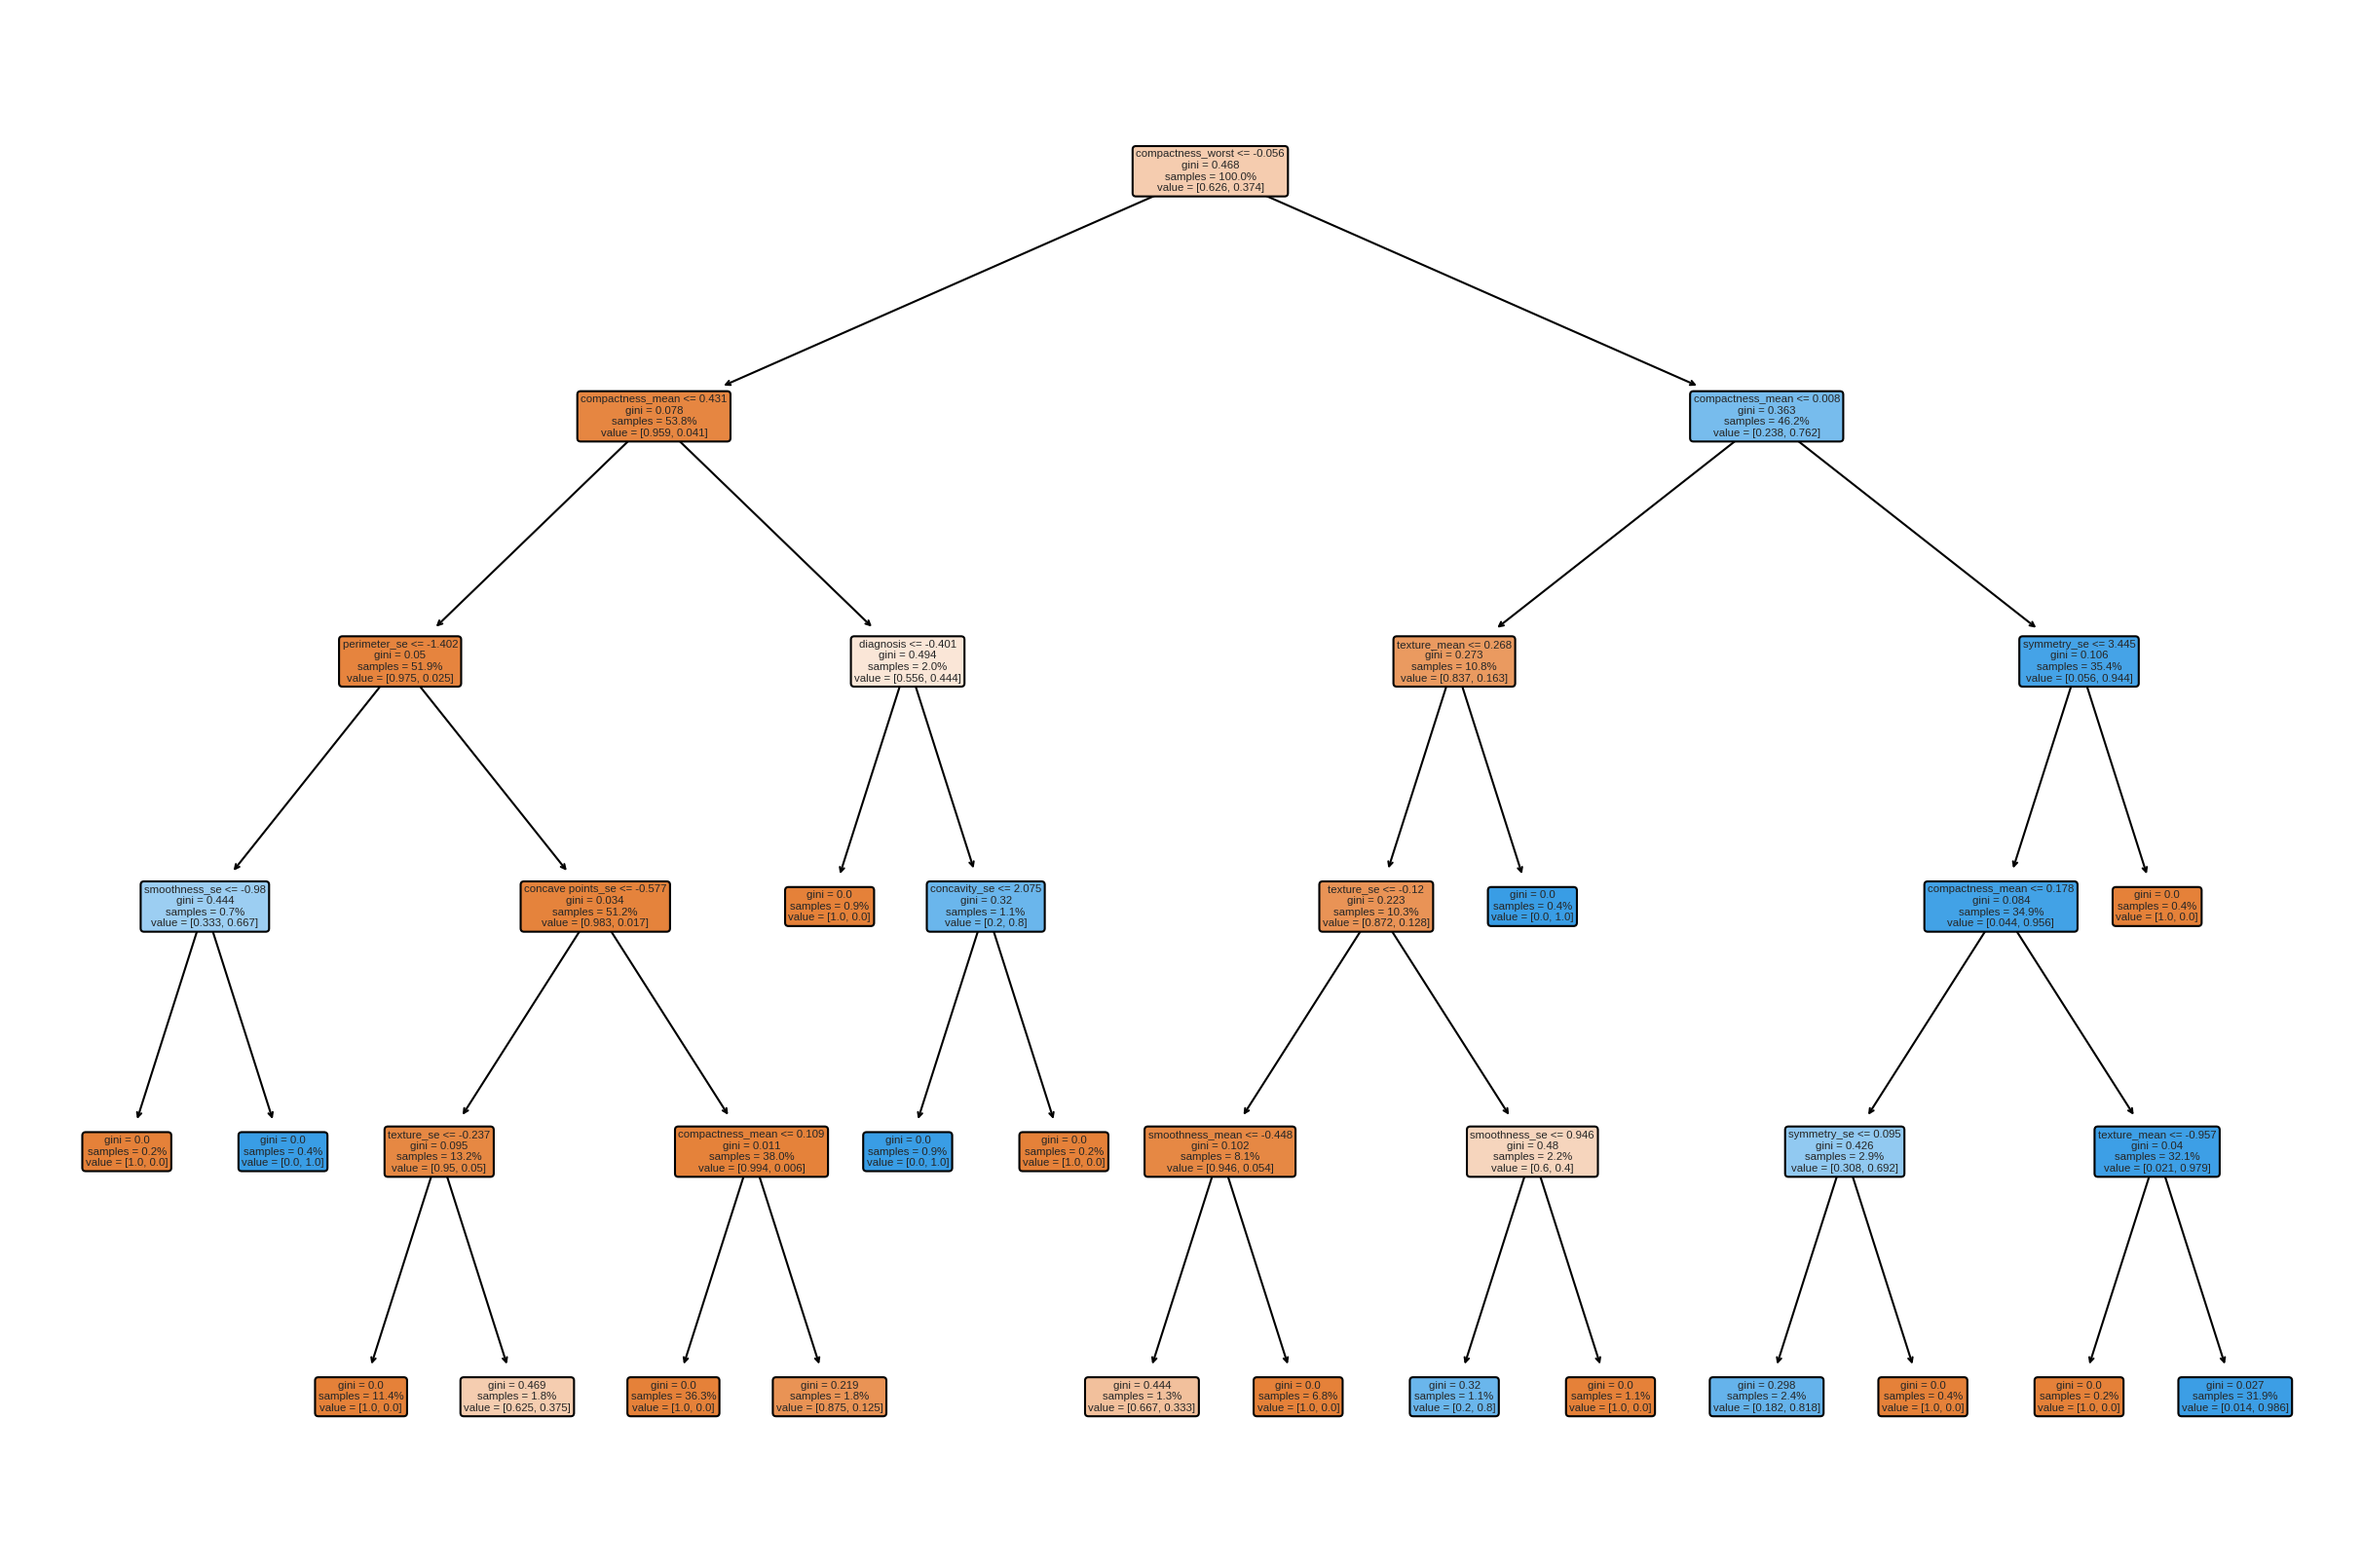

In [ ]:
plt.figure(dpi=500)
c = tree.plot_tree(best_model_train, filled = True, proportion = True, rounded = True, feature_names=data.keys())

# 6. Random Forests

A Random Forest in an ensemble of Decision Trees, trained via the bagging method. Ensemble combines multiple algorithms (in our case decision trees) in order to improve accuracy and stability and also to avoid overfitting. \
Starting from the original dataset D, B random sample are taken with replacement, note that the size of the samples is equals to the size training data. Then one decision tree is trained for each sample B, this sampling technique is called bootstrap. Once the training phase is done, for each candidate split, a random subset of features $\sqrt(n)$ is selected: Dping so trees are decorellated, this process is called feature bagging. At the end the class is assigned with majority vote coming from all the decision trees. All this process can be observe in the figure below. \

**PROS:**
* Good Performance on imbalanced datasets;
* Handling of huge amount of data;
* Good handling of missing data like decision trees;
* Little impact of outliers;
* Prevents overfitting;
* Useful to extract feature importance:

**CONS:**
* Predictions of the trees need to be uncorrelated.
* Black Box.

![alt text](https://miro.medium.com/max/875/1*58f1CZ8M4il0OZYg2oRN4w.png)

Best model:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100, 'random_state': 1}
F1 score:  0.9382716049382716
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



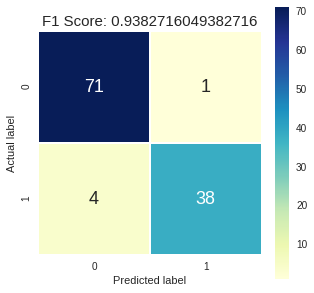

In [ ]:
params = {
  "criterion": ["gini", "entropy"],
  "n_estimators": [10, 50, 100],
  "max_depth": [5, 10, 15],
  "max_features": ["auto", "sqrt", "log2"],
  "random_state": [1]
}

tree = RandomForestClassifier()
model = GridSearchCV(tree, params)
model.fit(X_train, y_train)
best_model_train = model.best_estimator_
print("Best model:")
print(model.best_params_)
y_predt = best_model_train.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

# 7. Naive Bayes

The Naive Bayes algorithm is a supervied machine learning algorithm used for classification derived from the Bayes theorem. Given two events A and B, the bayes theorem can be written as:
\begin{align}
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
\end{align}
This rule can be reformulated as it follows: 
\begin{align}
P(\text{hypothesis }|\text{ evidence}) = \frac{P(\text{evidence }|\text{ hypothesis}) P(\text{hypothesis})}{P(\text{evidence})}
\end{align}
One assuption for applying the Naive Bayes classifier is that all samples have to i.i.d (independent identically distrbuted), which can we written as it follows:
\begin{align}
P(X_1,...,X_d|Y) = \prod_{i=1}^d P(X_i|Y)
\end{align}
Given: 
* Class prior $P(Y)$;
* d conditionally independent features $X_1,...,X_d$ given the class label Y;
* For each $X_i$ feature, we have the conditional likelihood $P(X_i|Y)$. \

The Naive Bayes decision rule is:
\begin{align}
f_{NB}(x) = \underset{y}{\text{arg max }} P(x_1,...,x_d|y)P(y) \
= \underset{y}{\text{arg max }}  \prod_{i=1}^dP(x_i|y)P(y) \
\end{align}

In this case we consider a Naive Bayes classifier which takes as the class prior a normal distribution. \
**PROS:**
* Real time predictions;
* Scalable with Large datasets;
* Multi class prediction is effectively done;
* Good performance with high dimensional data.

**CONS:**
* Independence of features does not hold: the fundamental Naive Bayes assumption is that each feature makes an independent and equal contribution to the outcome. However this condition is not met most of the times;
* Bad estimator: Probability outputs from predict_proba are not to be taken too seriously;
* Training data should represent population well: If you have no occurrences of a class label and a certain attribute value together (e.g. class=”No”, shape=”Overcast “) then the posterior probability will be zero. So if the training data is not representative of the population, Naive bayes does not work well.


F1 scores:  [0.83076923 0.87692308 0.89922481 0.85217391 0.86486486]


F1 score:  0.8536585365853658
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        72
           1       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



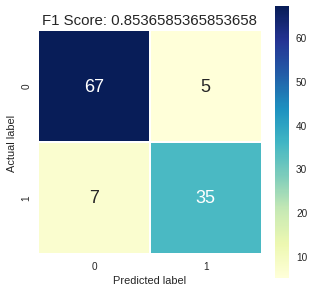

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clf, X, y, cv=cv, scoring="f1")
print("F1 scores: ", scores)
points_array = list(range(1, len(scores)+1))
fig = go.Figure(data=go.Scatter(x=points_array, y=scores))
fig.show()

y_predt = clf.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

# 8. PCA 

The Singular Value Decomposition (SVD) is among the most important matrix factorizations. We use the SVD to obtain low-rank approximations to matrices and to perform pseudo-inverses of non-square matrices to find the solution of a system of equations. Another important use of the SVD is as the underlying algorithm of principal component analysis (PCA), where high-dimensional data is decomposed into its most statistically descriptive factors. \
The SVD is a unique matrix decomposition that exists for every complex-valued matrix $X \in {R}^{\text{ n x m}}$:
\begin{align}
X = U \Sigma V^T
\end{align}
where  $U \in {R}^{\text{ n x n}}$ and $V \in {R}^{\text{ m x m}}$ are unitary matrices with orthonormal columns, and $\Sigma \in {R}^{\text{ n x m}}$ is a matrix with real, non-negative entries on the diagonal and zeros off the diagonal.

![alt text](https://raw.githubusercontent.com/sigeek/breast-cancer-analysis/master/docs/images/svd.png)

From this decomposition, we can retrieve the pricipal components of X contained in the matrix V. To project the training set onto a lower dimensional space, you can simply compute the matrix multiplication of the training set matrix $X$ by the matrix $W_d$, defined as the matrix containing the first d principal components (i.e. the matrix composed of the first d columns of V).

![alt text](https://raw.githubusercontent.com/sigeek/breast-cancer-analysis/master/docs/images/v_matrix.png)
\begin{align}
X_{d-proj} = X W_d
\end{align}

**PROS:**
* Removes correlated features;
* Improves algorithm performance;
* Reduces overfitting;
* Improves visualization.


**CONS:**
* Independent variables become less interpretable: Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features;
* Data standardization is must before PCA;
* Information Loss.



In [ ]:
U, S, Vt = np.linalg.svd(X_train)
W2 = Vt.T[:, :2]
X2D = X.to_numpy().dot(W2)
df = pd.DataFrame(X2D, columns =["x", "y"])
df["target"] = y
fig = px.scatter(df, x='x', y='y', color='target')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

We provide below some graphical representation of the decision boundaries computed with the SVM algorithm, both the linear and the non-linear case. To obtained a nice graphical representation, we use the training vector X projected into two dimensions just obtained with the PCA algorithm.

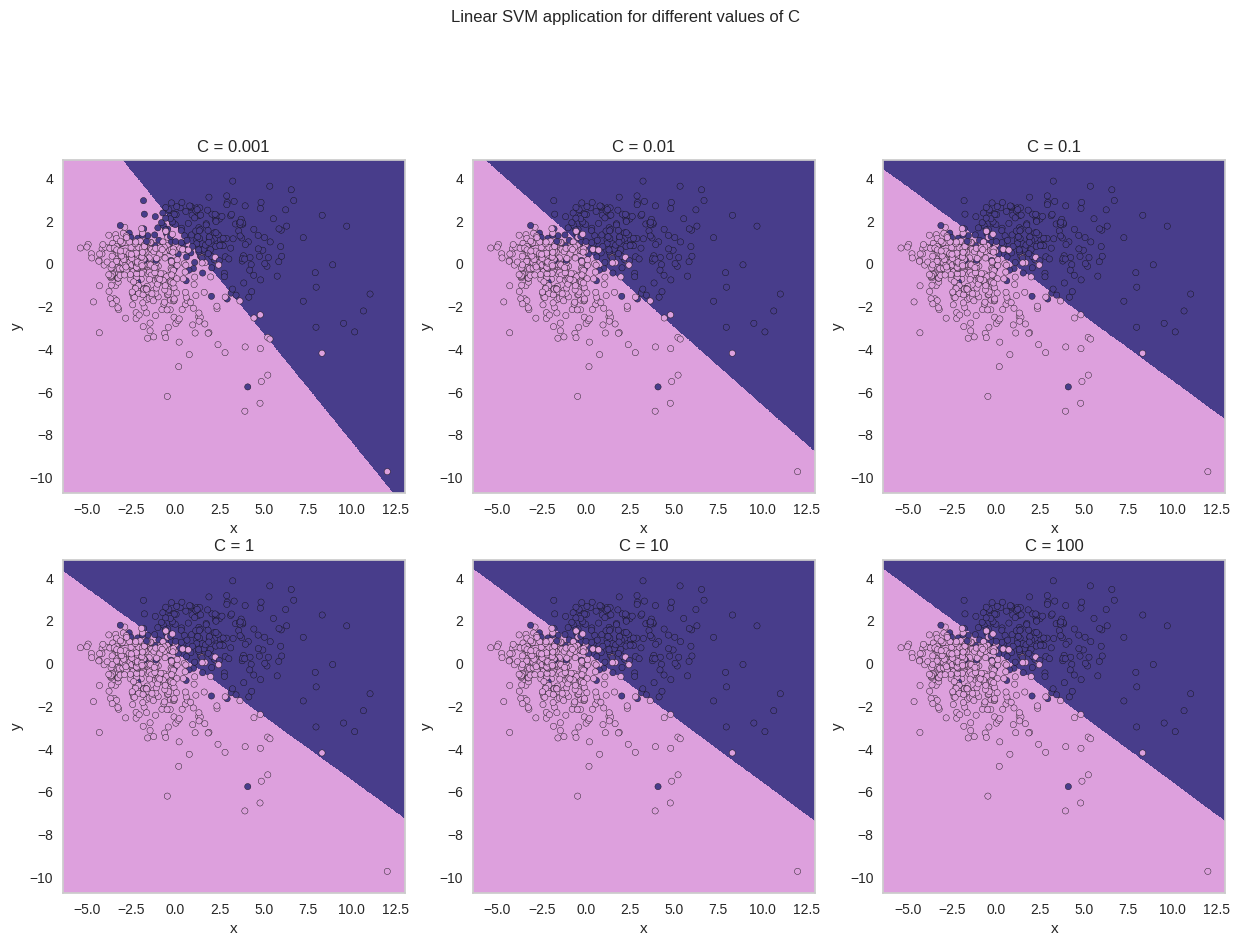

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
plot_data_boundaries(X2D, y, "LinearSVM", 
                     C, 'Linear SVM application for different values of C',
                     ['x', 'y'], 3, 3, False, "C")

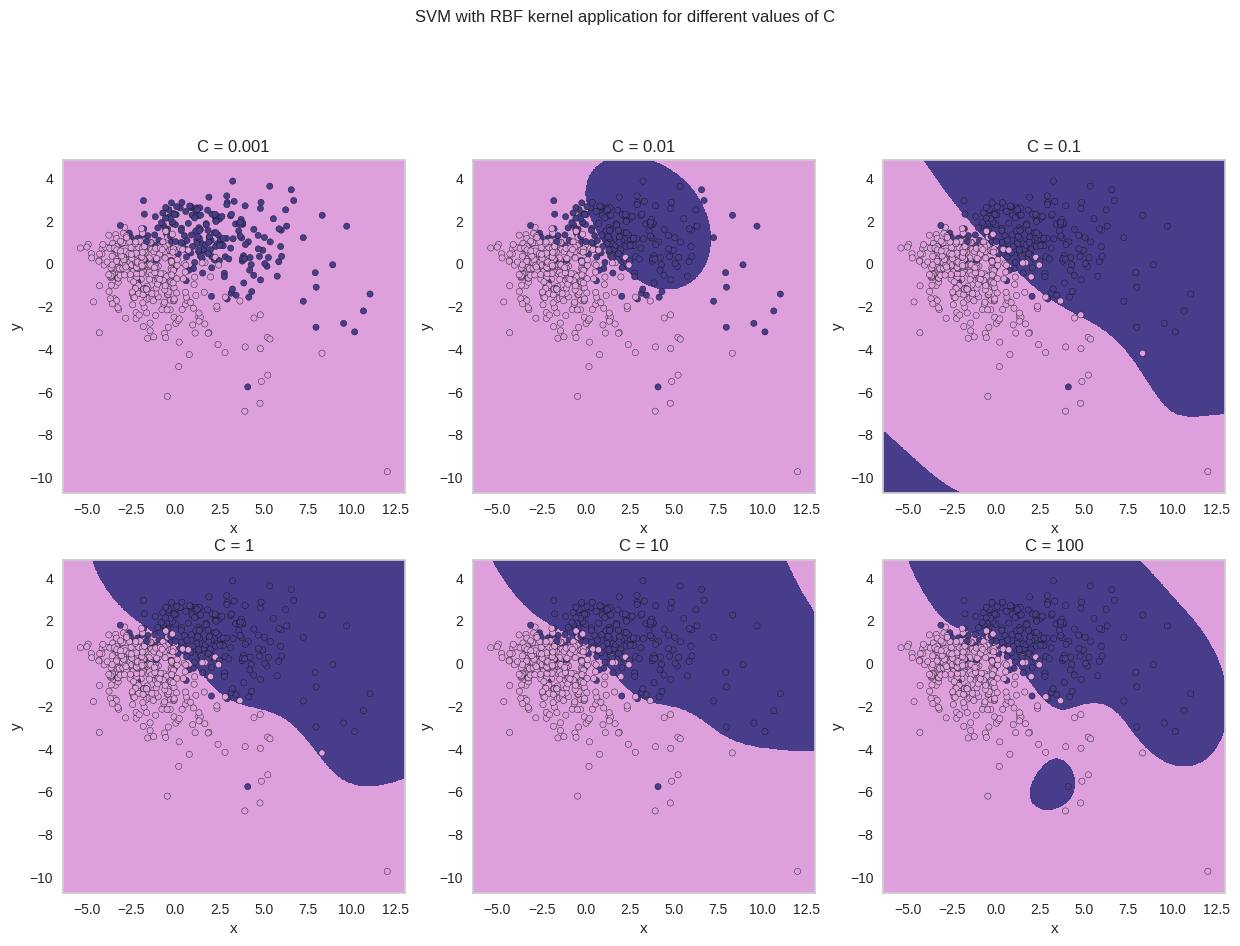

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
plot_data_boundaries(X2D, y, "RBFKernel", 
                     C, 'SVM with RBF kernel application for different values of C',
                     ['x', 'y'], 3, 3, False, "C")

In [ ]:
W3 = Vt.T[:, :3]
X3D = X.to_numpy().dot(W3)
df = pd.DataFrame(X3D, columns =["x", "y", "z"])
df["target"] = y
fig = px.scatter_3d(df, x='x', y='y', z='z', color='target')
fig.show()

# 9. K-Means

The K-Means algorithm is a clustering algorithm, the goal is to divide the training data in k clusters. The algorithm can be explained as it follows:
* At the beggining k random centroids are choosen; 
* All the istances are labelled according to the nearest centroid 
* Update the centroids. \

Given a set of observations, k-means clustering aims to partition the n observations into k sets, so to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the optimization problem to solve is the following:
\begin{align}
\underset{S}{\text{arg min}}\sum_{k=1}^{k}\sum_{x\in S_i}||x - \mu_i||^2
\end{align}
where $\mu$ is the mean of the points in the set $S_i$.


This process is repeated until the centroids do not change. The algorithm is guaranteed to converge in a finite number of steps. 

**PROS:**
* Easy to implement and to interpret;
* Flexible;
* Fast and efficient;
* Suitable in large dataset.


**CONS:**
* No optimal set of clusters;
* Sensitivity to scale;
* The numer of clusters needs to be specified.


![alt text](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif)


F1 scores:  [0.19428571 0.25531915 0.7804878  0.74336283 0.73684211]


F1 score:  0.6842105263157895
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        72
           1       0.76      0.62      0.68        42

    accuracy                           0.79       114
   macro avg       0.78      0.75      0.76       114
weighted avg       0.79      0.79      0.78       114



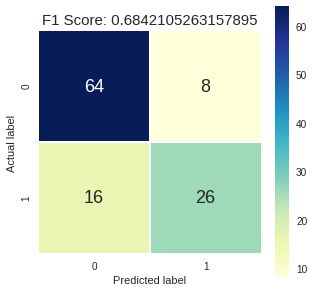

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)
y_pred = kmeans.predict(X_test)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(kmeans, X, y, cv=cv, scoring="f1")
print("F1 scores: ", scores)
points_array = list(range(1, len(scores)+1))
fig = go.Figure(data=go.Scatter(x=points_array, y=scores))
fig.show()

y_predt = kmeans.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

Here we show how K-Means algorithm works. We set the number of clusters equals to two, which is the number of our classes. The two centrois are reported in pink. 

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X2D)
centroids = kmeans.cluster_centers_
df = pd.DataFrame(X2D, columns =["x", "y"])
df["target"] = y
centroids =  pd.DataFrame(centroids, columns =["x", "y"])
centroids["target"] = [0.6, 0.6]
df = pd.concat([df, centroids], ignore_index=True)
fig = px.scatter(df, x='x', y='y', color='target')
fig.update_layout(autosize=False, width=700, height=700)
fig.show()

# 10. Hierarchical Clustering 

Hierarchical clustering is a family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a dendrogram. There exists different types of hierarchical clustering derived from the linkage metric used. Given two clusters A and B we can use the following metrics: \
* **ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach:
\begin{align}
\frac{n_An_B}{n_A + n_B}||m_A - m_B||^2
\end{align}
where $n_j$ is the number of points in the cluster and $m_j$ is the center of the cluster.
* **maximum or complete linkage**  minimizes the maximum distance between observations of pairs of clusters:
\begin{align}
\text{max }{d(a,b): a \in A, b \in B}
\end{align}
* **minimum or single linkage** minimizes the distance between the closest observations of pairs of clusters:
\begin{align}
\text{min }{d(a,b): a \in A, b \in B}
\end{align}
* **average linkage** minimizes the average of the distances between all observations of pairs of clusters:
\begin{align}
\frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B}d(a,b).
\end{align}

**PROS:**
* Like K-Means, the choice of the number of clusters is crucial;
* Easy to implement.

**CONS:**
* High time complexity;
* No objective function to minimize;
* Every linkage metric has a different disadvantages: the complete linkage tends to break large cluster and the single linkage is sensitive to noise and outliers.

![alt text](https://image1.slideserve.com/2418566/hierarchical-clustering-comparison-n.jpg)

F1 score:  0.2641509433962264
              precision    recall  f1-score   support

           0       0.66      0.94      0.78        72
           1       0.64      0.17      0.26        42

    accuracy                           0.66       114
   macro avg       0.65      0.56      0.52       114
weighted avg       0.65      0.66      0.59       114



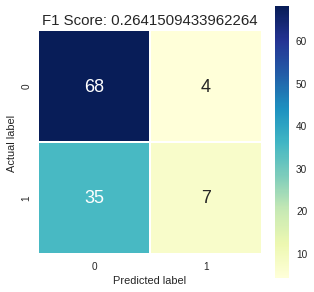

In [ ]:
### ward variant
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_predt = model.fit_predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

F1 score:  0.47945205479452063
              precision    recall  f1-score   support

           0       0.30      0.04      0.07        72
           1       0.34      0.83      0.48        42

    accuracy                           0.33       114
   macro avg       0.32      0.44      0.28       114
weighted avg       0.31      0.33      0.22       114



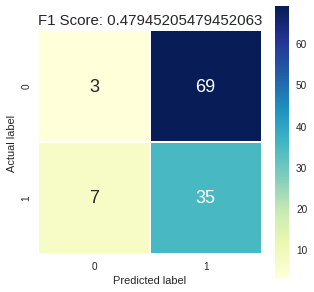

In [ ]:
### complete linkage 
model = AgglomerativeClustering(n_clusters=2, linkage='complete')
y_predt = model.fit_predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

F1 score:  0.522875816993464
              precision    recall  f1-score   support

           0       0.33      0.01      0.03        72
           1       0.36      0.95      0.52        42

    accuracy                           0.36       114
   macro avg       0.35      0.48      0.27       114
weighted avg       0.34      0.36      0.21       114



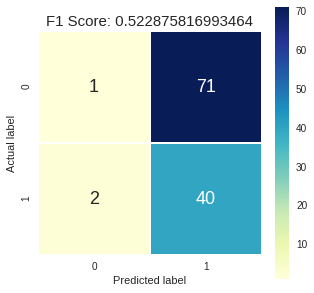

In [ ]:
### average linkage
model = AgglomerativeClustering(n_clusters=2, linkage='average')
y_predt = model.fit_predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

F1 score:  0.046511627906976744
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        72
           1       1.00      0.02      0.05        42

    accuracy                           0.64       114
   macro avg       0.82      0.51      0.41       114
weighted avg       0.77      0.64      0.51       114



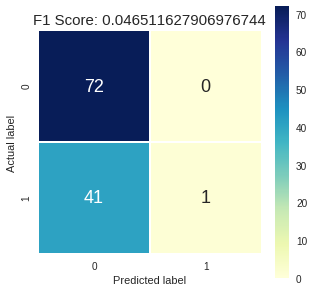

In [ ]:
### single linkage
model = AgglomerativeClustering(n_clusters=2, linkage='single')
y_predt = model.fit_predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

# 11. K-Nearest Neighbors

The K-Nearest Neighbors is one of the unsupervised algorithms. The learning process to classify an unknown record is the following:
* Compute distance to other training records;
* Identify k nearest neighbors;
* Use class labels of nearest neighbors to determine the class label by taking the majority vote. \

The distance metric used is Minkowski, and with p=2 is equivalent to the standard Euclidean metric. The Minkowski distance is defined in the following way:
\begin{align}
d(x, y) = \left (  \sum_{i=1}^n|x_i - y_i|^p \right )^{1/p}
\end{align}
Another metric which can be used is the Mahalanobis distance:
\begin{align}
d(x, y) = ( x - y )^{T}\Sigma^{-1}(x-y)
\end{align}

**PROS:**
* Constantly evolving model: when it is exposed to new data, it changes to accommodate the new data points;
* Multi-class problems can also be solved;
* One Hyperparameter, the number of neighbors k.


**CONS:**
* Slow for large datasets;
* Curse of dimensionality: does not work very well on datasets with large number of features;
* Scaling of data absolute must;
* Does not work well on Imbalanced data. So before using k-NN either undersamplemajority class or oversample minority class and have a balanced dataset;
* Sensitive to outliers;
* Can’t deal well with missing values.


In [ ]:
model = KNeighborsClassifier(n_neighbors=15)
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model, X, y, cv=cv, scoring="f1")
print("F1 scores: ", scores)
points_array = list(range(1, len(scores)+1))
fig = go.Figure(data=go.Scatter(x=points_array, y=scores))
fig.show()

y_predt = model.predict(X_test)
print("F1 score: ", f1_score(y_test, y_predt))
print(classification_report(y_test, y_predt))
plot_accuracy(y_test, y_predt)

F1 scores:  [0.91935484 0.93129771 0.93650794 0.94017094 0.94285714]


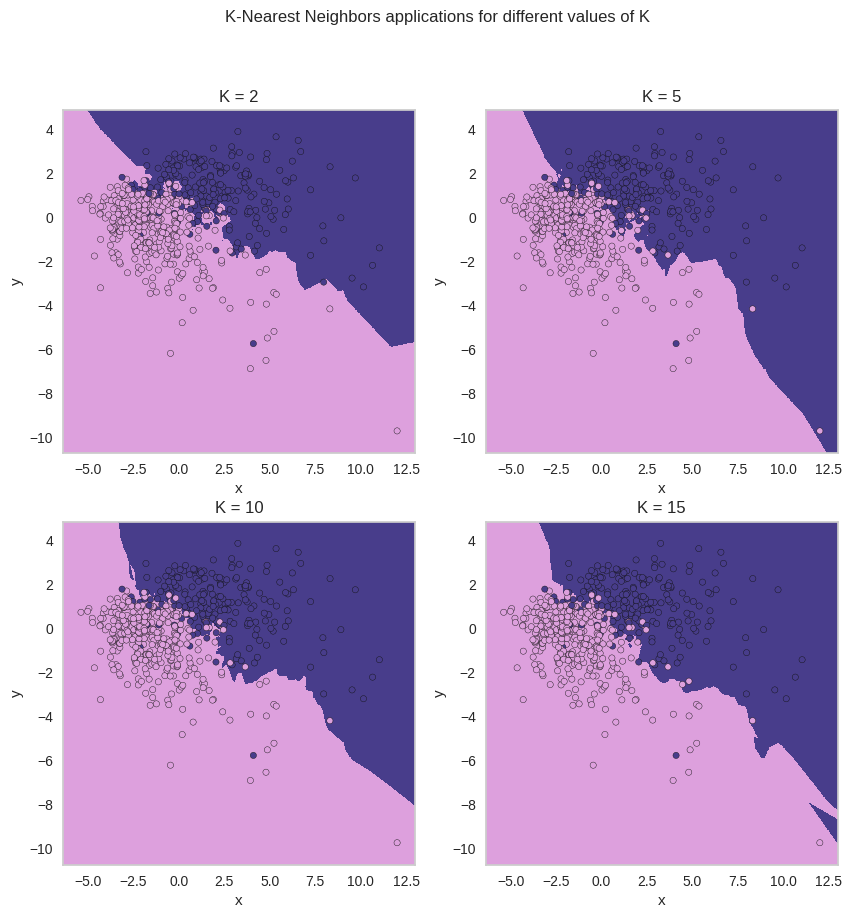

In [ ]:
K = np.array([2, 5, 10, 15])
plot_data_boundaries(X2D, y, "KNN", 
                     K, 'K-Nearest Neighbors applications for different values of K',
                     ['x', 'y'], 2, 2, False, "K")

# 12. Conclusions

Now we have analyzed all the fundamentals machine algorithms we can say that there is no "go-to" algorithm. Every algorithm is built to perform better under a set of assuptions and characteristics of the dataset. Last but not least, a good machine learning pipeline is made of a good dataset analysis, if you do not understand the data you won't be able to apply the best possible algorithm.
 